In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
import tensorflow_hub as hub
import tensorflow as tf

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/4",
                   trainable=False),  # Can be True, see below.
    #tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [4]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/4",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 96, 96, 3])  # Batch input shape.


In [5]:
m.build([None, 96,96,3])

In [6]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
from skimage import io
import skimage

In [8]:
image = io.imread("cropped/image_0.jpg")

In [9]:
image.shape

(121, 120, 3)

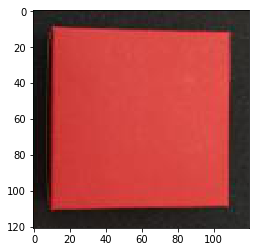

In [10]:
plt.imshow(image)

In [11]:
preprocessed = skimage.transform.resize(image, (96,96))

/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


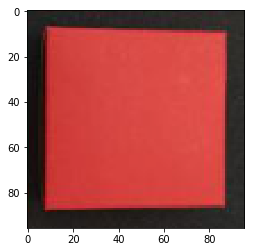

In [12]:
plt.imshow(preprocessed)

In [13]:
images = []
images.append(preprocessed)
last = keras.applications.mobilenet.preprocess_input(preprocessed)

In [16]:
preprocessed.shape

(96, 96, 3)

In [17]:
pd = m.predict(last)

ValueError: in user code:

    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow_hub/keras_layer.py:235 call  *
        result = smart_cond.smart_cond(training,
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/saved_model/load.py:486 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py:580 __call__
        result = self._call(*args, **kwds)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py:618 _call
        results = self._stateful_fn(*args, **kwds)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/function.py:2419 __call__
        graph_function, args, kwargs = self._maybe_define_function(args, kwargs)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/function.py:2777 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/function.py:2667 _create_graph_function
        capture_by_value=self._capture_by_value),
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:981 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py:441 wrapped_fn
        return weak_wrapped_fn().__wrapped__(*args, **kwds)
    /home/mehmet/.local/lib/python3.6/site-packages/tensorflow/python/saved_model/function_deserialization.py:261 restored_function_body
        "\n\n".join(signature_descriptions)))

    ValueError: Could not find matching function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * Tensor("inputs:0", shape=(32, 96, 3), dtype=float32)
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
    Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
